<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221028_4_Dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, shutil
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt

In [ ]:
original_dataset_dir = 'data/original/train'

base_dir = 'data/cats_vs_dogs'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [ ]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# 훈련용 고양이 10000개
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 훈련용 강아지 10000개
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 테스트용 고양이 2500개
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 테스트용 강아지 2500개
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 10000
훈련용 강아지 이미지 전체 개수: 10000
테스트용 고양이 이미지 전체 개수: 2500
테스트용 강아지 이미지 전체 개수: 2500


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# 1. (1) * (3 x 3) * (3) * (32) + 32=> w = 288 / bias = 32 / total = 896 => 이미지크기 150* 150 => (150-2) * (150-2) => (148/2=74) * (148/2=74)
# 2. (32) *  (3 x 3) * (64) + 64 =>  w =18432 / bias = 64 / total = 18496 => 이미지크기 74 * 74 => (74-2) * (74-2) => (72/2=36) * (72/2=36)
# 3. (64) *  (3 x 3) * (128) + 128 =>  w =73728 / bias = 128 / total = 73856 => 이미지크기 36 * 36 => (36-2) * (36-2) => (34/2=17) * (34/2=17)
# 4. (128) *  (3 x 3) * (128) + 128 =>  w =147456 / bias = 128 / total = 147584 => 이미지크기 17 * 17 => (17-2) * (17-2) => (15/2=7) * (15/2=7)
# 5. 이미지 크기 150 * 150 였는데 Conv2D(3,3) 이랑(2,2) maxpooling 을 총 4번하면서  => 7 * 7  
# 6. Flatten ==> 1차원으로 눌러서 7 * 7 크기의 128개 ==> 입력 6272
# 7. Dropout 은 파라미터 영향 x
# 8. (6272) * (512) + 512 =>  w = 3,211,264 / bias = 512 / total = 3,211,776
# 9. (512) * (1) + 1 = w = 512 / bias = 1 / total = 513

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
# 알파벳순서로 정렬한뒤, 첫번째데이터값을 0, 두번째데이터값을 1로 설정하고 가지고올때 150,150 크기로 가져옴

validation_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
for data_batch, lables_batch in train_generator:
    print('배치 데이터 크기 : ', data_batch.shape)
    print('배치 레이블 크기 : ', lables_batch.shape)
    break

배치 데이터 크기 :  (20, 150, 150, 3)
배치 레이블 크기 :  (20,)


In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)
# 최소2시간반 4시10분시작

Epoch 1/30
1000/1000 [==============================] - 286s 285ms/step - loss: 0.6787 - accuracy: 0.5609 - val_loss: 0.6304 - val_accuracy: 0.6512
Epoch 2/30
1000/1000 [==============================] - 225s 225ms/step - loss: 0.5873 - accuracy: 0.6895 - val_loss: 0.5059 - val_accuracy: 0.7628
Epoch 3/30
1000/1000 [==============================] - 217s 217ms/step - loss: 0.4802 - accuracy: 0.7653 - val_loss: 0.4421 - val_accuracy: 0.8002
Epoch 4/30
1000/1000 [==============================] - 223s 223ms/step - loss: 0.4089 - accuracy: 0.8145 - val_loss: 0.3988 - val_accuracy: 0.8204
Epoch 5/30
1000/1000 [==============================] - 222s 222ms/step - loss: 0.3505 - accuracy: 0.8457 - val_loss: 0.3573 - val_accuracy: 0.8502
Epoch 6/30
1000/1000 [==============================] - 218s 218ms/step - loss: 0.3039 - accuracy: 0.8699 - val_loss: 0.2950 - val_accuracy: 0.8736
Epoch 7/30
1000/1000 [==============================] - 223s 223ms/step - loss: 0.2643 - accuracy: 0.8879 - val_

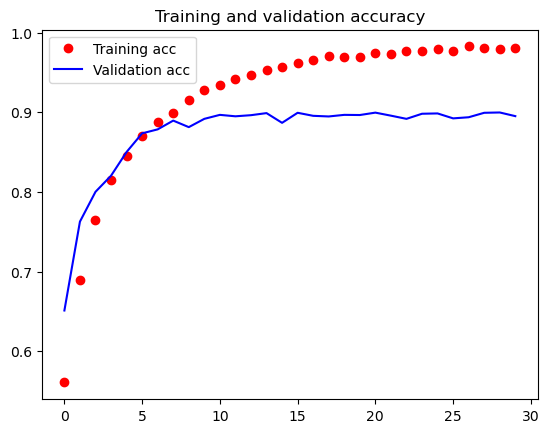

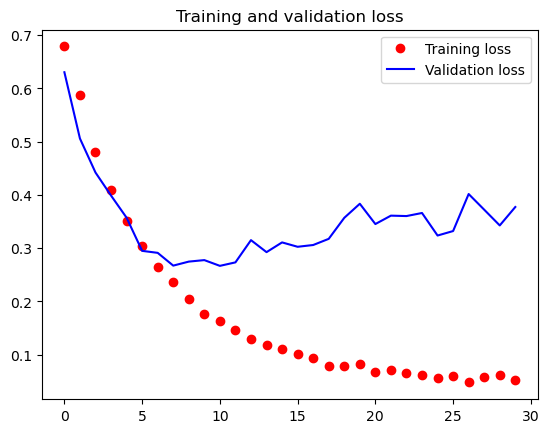

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()